<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [AE1] - Prepare a noisy MNIST dataset
<!-- DESC --> Episode 1: Preparation of a noisy MNIST dataset

<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Prepare a MNIST noisy dataset, usable with our denoiser autoencoder (duration : <50s)

## What we're going to do :

 - Load original MNIST dataset
 - Adding noise, a lot !
 - Save it :-)

## Step 1 - Init and set parameters
### 1.1 - Init python

In [1]:
import numpy as np
import sys

from skimage import io
from skimage.util import random_noise

import modules.MNIST
from modules.MNIST     import MNIST

sys.path.append('..')
import fidle.pwk as pwk

run_dir='./run/AE1'
datasets_dir = pwk.init('AE1', run_dir)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.20
Notebook id          : AE1
Run time             : Sunday 14 March 2021, 22:24:00
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run/AE1
Update keras cache   : False
Save figs            : True
Path figs            : ./run/AE1/figs


### 1.2 - Parameters
`prepared_dataset` : Filename of the future prepared dataset (Can be in ./data)  

In [2]:
prepared_dataset = './data/mnist-noisy.h5'

## Step 2 - Get original dataset
We load :  
`clean_data` : Original and clean images - This is what we will want to ontain at the **output** of the AE  
`class_data` : Image classes - Useless, because the training will be unsupervised  
We build :  
`noisy_data` : Noisy images - These are the images that we will give as **input** to our AE


In [3]:
clean_data, class_data = MNIST.get_origine()

Dataset loaded.
Normalized.
Reshaped.
Concatenate.
x shape : (70000, 28, 28, 1)
y shape : (70000,)


## Step 3 - Add noise
We add noise to the original images (clean_data) to obtain noisy images (noisy_data)  
Need 30-40 seconds

In [4]:
def noise_it(data):
    new_data = np.copy(data)
    for i,image in enumerate(new_data):
        pwk.update_progress('Add noise : ',i+1,len(new_data))
        image=random_noise(image, mode='gaussian', mean=0, var=0.3)
        image=random_noise(image, mode='s&p',      amount=0.2, salt_vs_pepper=0.5)
        image=random_noise(image, mode='poisson') 
        image=random_noise(image, mode='speckle',  mean=0, var=0.1)
        new_data[i]=image
    print('Done.')
    return new_data

# ---- Add noise to input data : x_data
#
noisy_data = noise_it(clean_data)


Add noise :      [########################################] 100.0% of 70000
Done.


## Step 4 - Have a look

Clean dataset (clean_data) :  (70000, 28, 28, 1)
Noisy dataset (noisy_data) :  (70000, 28, 28, 1)


<br>**Noisy images we'll have in input (or x)**

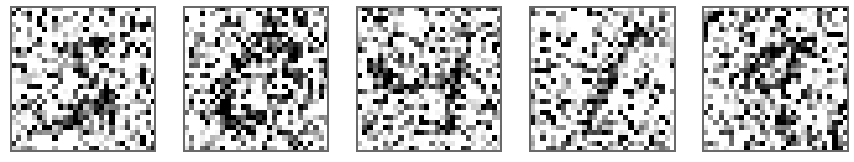

<br>**Clean images we want to obtain (or y)**

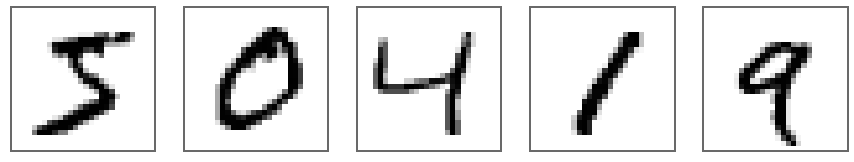

In [5]:
print('Clean dataset (clean_data) : ',clean_data.shape)
print('Noisy dataset (noisy_data) : ',noisy_data.shape)

pwk.subtitle("Noisy images we'll have in input (or x)")
pwk.plot_images(noisy_data[:5], None, indices='all', columns=5, x_size=3,y_size=3, interpolation=None, save_as='01-noisy')
pwk.subtitle('Clean images we want to obtain (or y)')
pwk.plot_images(clean_data[:5], None, indices='all', columns=5, x_size=3,y_size=3, interpolation=None, save_as='02-original')


## Step 5 - Shuffle dataset

In [6]:
p = np.random.permutation(len(clean_data))
clean_data, noisy_data, class_data = clean_data[p], noisy_data[p], class_data[p]
print('Shuffled.')

Shuffled.


## Step 6 - Save our prepared dataset

In [7]:
MNIST.save_prepared_dataset( clean_data, noisy_data, class_data, filename=prepared_dataset )

Saved.


clean_data shape is :  (70000, 28, 28, 1)
noisy_data shape is :  (70000, 28, 28, 1)
class_data shape is :  (70000,)


In [8]:
pwk.end()

End time is : Sunday 14 March 2021, 22:24:50
Duration is : 00:00:50 963ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>